In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
def record_data_info(class_nm, txt_cnt):
    with open('../data/info.txt', 'a') as f:
        f.write(class_nm + ': ' + str(txt_cnt) + '\n')

In [3]:
def get_df():
    data_path = '../data/code25/'
    class_dir_list = [os.listdir(data_path)]

    # count = 0
    
    data_list = []
    class_list = []

    max_bytes, min_bytes = -1, 999999
    size_dict = {}

    for class_nm in os.listdir(data_path):
        
        class_txt_cnt = 0
        class_flag = 0

        if class_nm == '.DS_Store': continue

        while class_flag != 1:
            for txt_file in os.listdir(data_path + class_nm):
                
                if txt_file.endswith('.txt'):
                    file_path = data_path + class_nm + '/' + txt_file

                    # file_size = os.path.getsize(file_path)

                    # if not file_size in size_dict:
                    #     size_dict[file_size] = 1
                    # else:
                    #     size_dict[file_size] += 1

                    # if file_size > max_bytes: max_bytes = file_size
                    # if file_size < min_bytes: min_bytes = file_size
                
                    with open(file_path, 'r') as file:
                        class_label = class_nm

                        strings = file.readlines()
                        data = ' '.join(strings)

                        char_cnt = 0
                        data_124 = ''
                        for chars in data:
                            if char_cnt != 124:
                                char_cnt += 1
                                data_124 += chars
                            elif char_cnt == 124:
                                char_cnt = 0
                                class_txt_cnt += 1
                                data_list.append(data_124)
                                class_list.append(class_label)

                                if not len(data_124) in size_dict:
                                    size_dict[len(data_124)] = 1
                                else:
                                    size_dict[len(data_124)] += 1
                                
                                data_124 = ''

                            if class_txt_cnt == 10000:
                                class_flag = 1
                                break
                
                if class_flag == 1:
                    break

                    # count += 1
                
                # if count == 10: break
                

        record_data_info(class_nm, class_txt_cnt)
        # break
    
    data = {'sourceCode': data_list, 'classLabel': class_list}
    df = pd.DataFrame(data)

    return df, [max_bytes, min_bytes], size_dict

In [4]:
df, size_info, size_dict = get_df()

In [5]:
print('max bytes: ', size_info[0])
print('max KB:', size_info[0]/1024)

print()

print('min bytes: ', size_info[1])
print('min KB:', size_info[1]/1024)

max bytes:  -1
max KB: -0.0009765625

min bytes:  999999
min KB: 976.5615234375


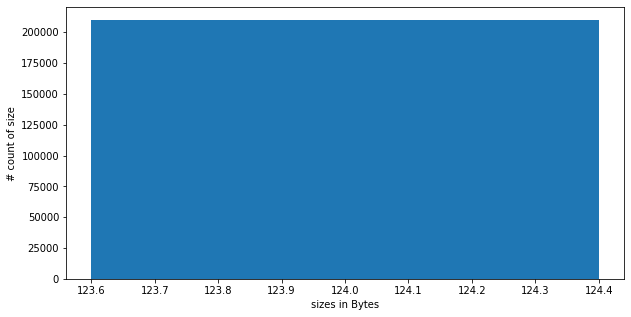

In [6]:
from turtle import position
import matplotlib.pyplot as plt

sizes = list(size_dict.keys())
counts = list(size_dict.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(sizes, counts)

plt.xlabel('sizes in Bytes')
plt.ylabel('# count of size')
plt.show()

In [7]:
size_dict[39224]

KeyError: 39224

In [ ]:
sourceCode_np = df.sourceCode.values
codeClass_np = df.classLabel.values

In [ ]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

def split(str):
    return [char for char in str]

def tokenize(sourceCode):
    """Tokenize texts, build vocabulary and find maximum sentence length.
    
    Args:
        texts (List[str]): List of text data
    
    Returns:
        tokenized_texts (List[List[str]]): List of list of tokens
        word2idx (Dict): Vocabulary built from the corpus
        max_len (int): Maximum sentence length
    """

    max_len = 0
    tokenized_codes = []
    ch2idx = {}

    # Add <pad> and <unk> tokens to the vocabulary
    ch2idx['<pad>'] = 0

    # Building our vocab from the corpus starting from index 2
    idx = 1
    for code in sourceCode:
        tokenized_code = split(code)

        # Add `tokenized_sent` to `tokenized_texts`
        tokenized_codes.append(tokenized_code)

        # Add new token to `word2idx`
        for token in tokenized_code:
            if token not in ch2idx:
                ch2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_code))

    return tokenized_codes, ch2idx, max_len

def encode(tokenized_codes, ch2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_code in tokenized_codes:
        # Pad sentences to max_len
        tokenized_code += ['<pad>'] * (max_len - len(tokenized_code))

        # Encode tokens to input_ids
        input_id = [ch2idx.get(token) for token in tokenized_code]
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
# # Tokenize, build vocabulary, encode tokens
# print("Tokenizing...\n")
# tokenized_sourceCodes, ch2idx, max_len = tokenize(sourceCode_np)
# input_ids = encode(tokenized_sourceCodes, ch2idx, max_len)